In [2]:
import pandas as pd

train_df = pd.read_csv('./datasets/titanic/train.csv')

In [4]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy = 'median')
train_df['Age'] = num_imputer.fit_transform(train_df[['Age']])

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Fare']

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

irrelevant_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=irrelevant_features, inplace=True)

In [12]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



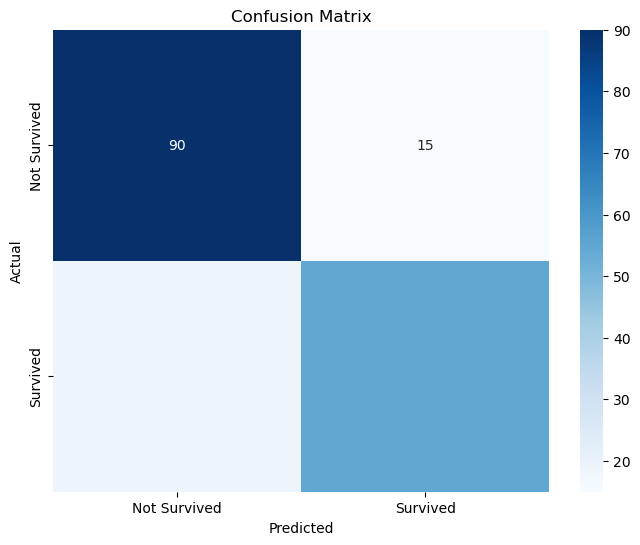

In [42]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()